In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import sys

In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = ''
print(os.environ['CUDA_VISIBLE_DEVICES'])

In [3]:
sys.path.append('../models/cWGAN/Run_2021-03-09_0/')
import cWGAN
save_dir = '../models/cWGAN/Run_2021-03-09_0/'
assert(os.path.isdir(save_dir))

In [4]:
data = np.loadtxt("../data/processed/newPartonMatchedJetsNoRecoPtCut.txt", skiprows=2)

In [5]:
new_data = np.loadtxt("../src/pythia/test-cppflow.txt")

In [6]:
total_energy_new = np.loadtxt("../total_parton_E.txt")

In [7]:
total_energy_old = np.loadtxt("../src/pythia/total_energy.txt")

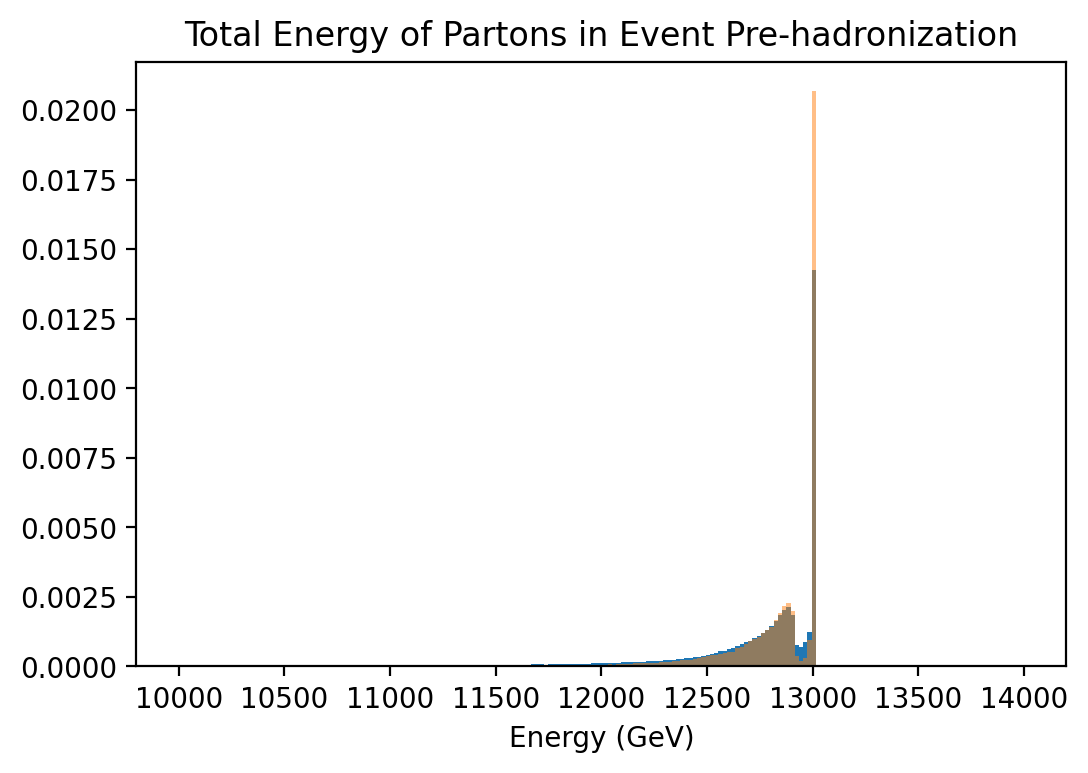

In [41]:
fig = plt.figure(figsize=(6,4), dpi=200)
bins = np.linspace(10000, 14000, 200)
ax = fig.add_subplot(111)
ax.set_title('Total Energy of Partons in Event Pre-hadronization')
ax.set_xlabel("Energy (GeV)")
ax.hist(total_energy_new, bins=bins, density=True)
ax.hist(total_energy_old, bins=bins, density=True, alpha=0.5)
plt.show()

In [8]:
print(new_data[0])
print(data[0])

[30.1497    0.303956 -0.672888 31.8139   32.3077    0.295334 -0.676019
 34.7941  ]
[41.4024   -1.27316  -0.891338 80.6118   36.3716   -1.24909  -0.87713
 69.0265  ]


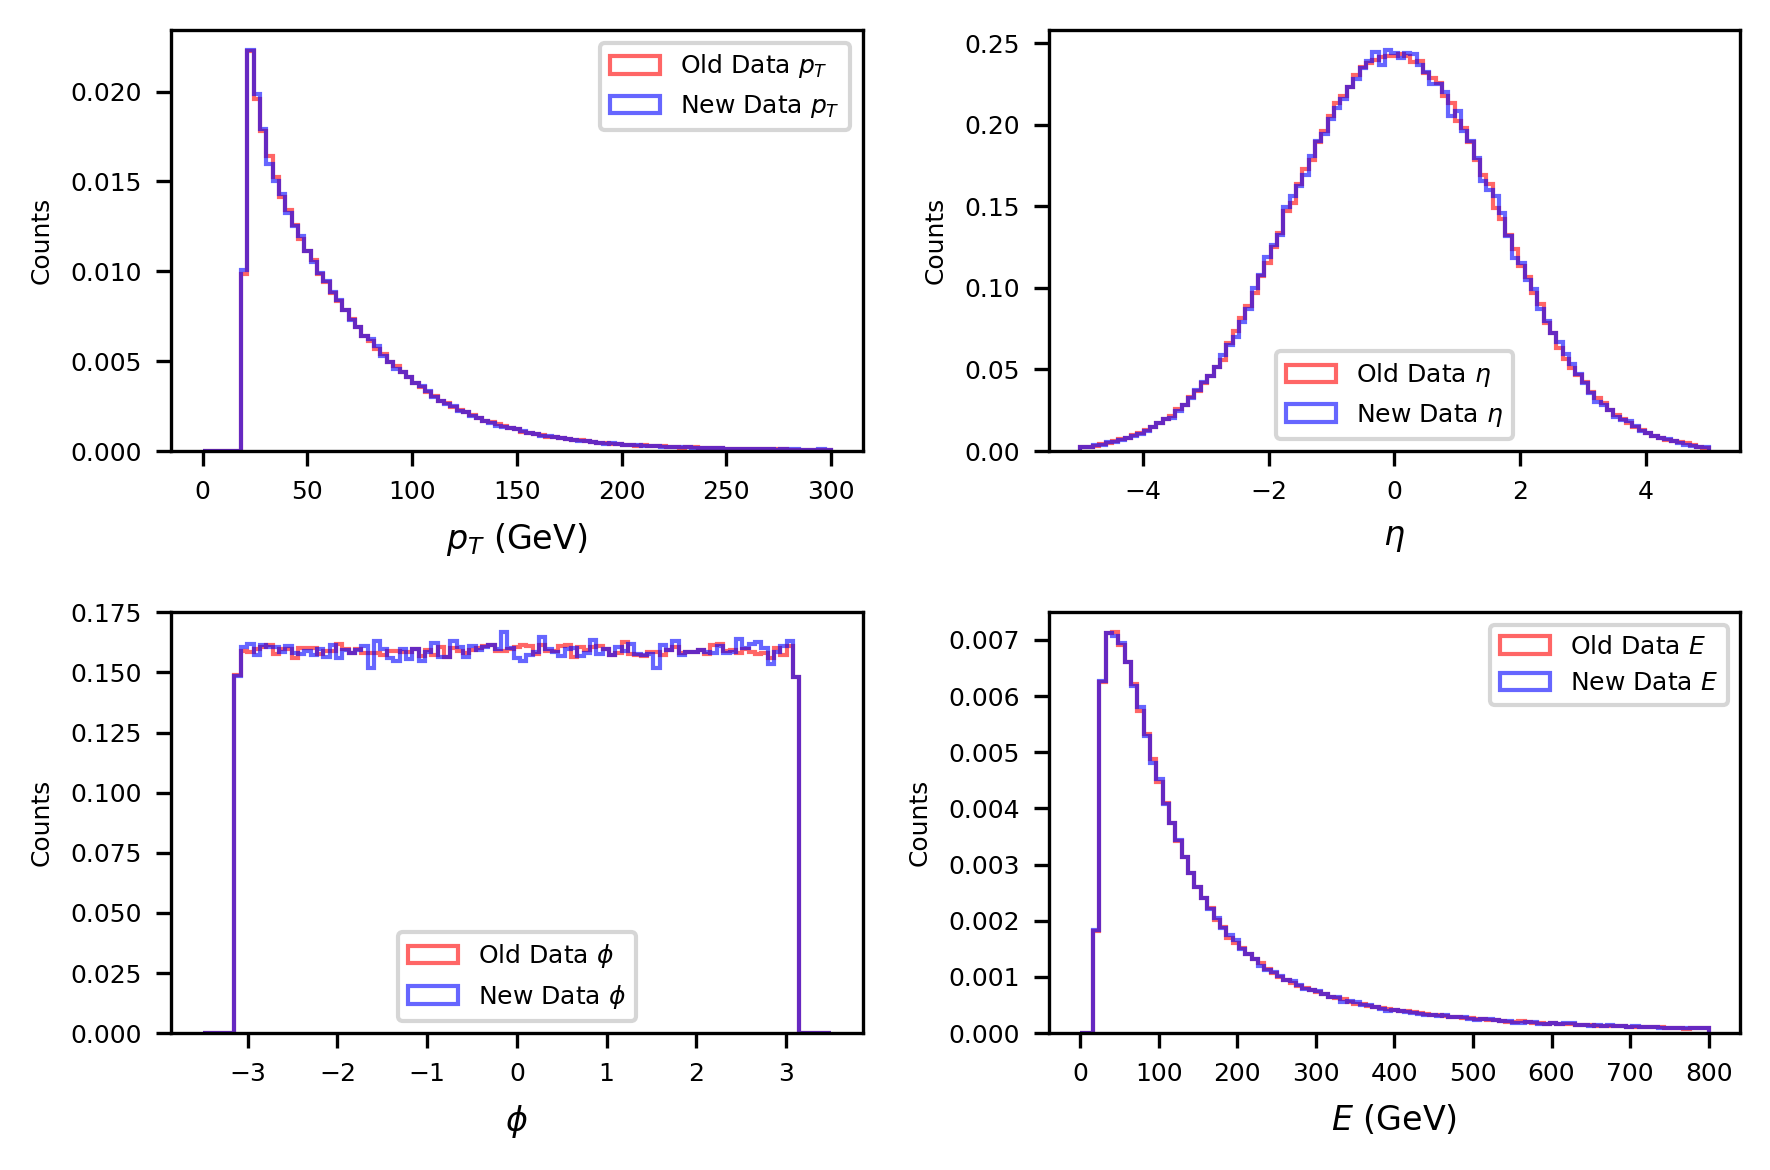

In [9]:
fig = plt.figure(figsize=(6,4), dpi=300)
bins = np.linspace(0, 300, 100)
ax1 = fig.add_subplot(221)
ax1.hist(data[:, 0], label=r"Old Data $p_T$", bins=bins, alpha=0.6, ec="r", histtype='step', density=True)
ax1.hist(new_data[:, 0], label=r"New Data $p_T$", bins=bins, alpha=0.6, ec="b", histtype='step', density=True)
#ax1.set_title(r"True and Predicted Marginal Reco Jet $P_t$ Distributions")
ax1.set_xlabel(r"$p_T$ (GeV)", size=8)
ax1.set_ylabel("Counts", size=6)
ax1.tick_params(axis='x', labelsize=6)
ax1.tick_params(axis='y', labelsize=6)
ax1.legend(fontsize=6)

bins = np.linspace(-5, 5, 100)
ax2 = fig.add_subplot(222)
ax2.hist(data[:, 1], label=r"Old Data $\eta$", bins=bins, alpha=0.6, ec="r", histtype='step', density=True)
ax2.hist(new_data[:, 1], label=r"New Data $\eta$", bins=bins, alpha=0.6, ec="b", histtype='step', density=True)
#ax2.set_title(r"True and Predicted Marginal Reco Jet $\eta$ Distributions")
ax2.tick_params(axis='x', labelsize=6)
ax2.tick_params(axis='y', labelsize=6)
ax2.set_xlabel(r"$\eta$", size=8)
ax2.set_ylabel("Counts", size=6)
ax2.legend(loc='lower center', fontsize=6)

bins = np.linspace(-3.5, 3.5, 100)
ax3 = fig.add_subplot(223)
ax3.hist(data[:, 2], label=r"Old Data $\phi$", bins=bins, alpha=0.6, ec="r", histtype='step', density=True)
ax3.hist(new_data[:, 2], label=r"New Data $\phi$", bins=bins, ec="b", alpha=0.6, histtype='step', density=True)
#ax3.set_title(r"True and Predicted Marginal Jet $\phi$ Distributions")
ax3.tick_params(axis='x', labelsize=6)
ax3.tick_params(axis='y', labelsize=6)
ax3.set_xlabel(r"$\phi$", size=8)
ax3.set_ylabel("Counts", size=6)
ax3.legend(loc='lower center', fontsize=6)

bins = np.linspace(0, 800, 100)
ax4 = fig.add_subplot(224)
ax4.hist(data[:, 3], label=r"Old Data $E$", bins=bins, alpha=0.6, ec="r", histtype='step', density=True)
ax4.hist(new_data[:, 3], label=r"New Data $E$", bins=bins, ec="b", alpha=0.6, histtype='step', density=True)
#ax4.set_title(r"True and Predicted Marginal Reco Jet Energy Distributions")
ax4.set_xlabel(r"$E$ (GeV)", size=8)
ax4.set_ylabel("Counts", size=6)
ax4.tick_params(axis='x', labelsize=6)
ax4.tick_params(axis='y', labelsize=6)
ax4.legend(fontsize=6)
plt.tight_layout()

plt.show()

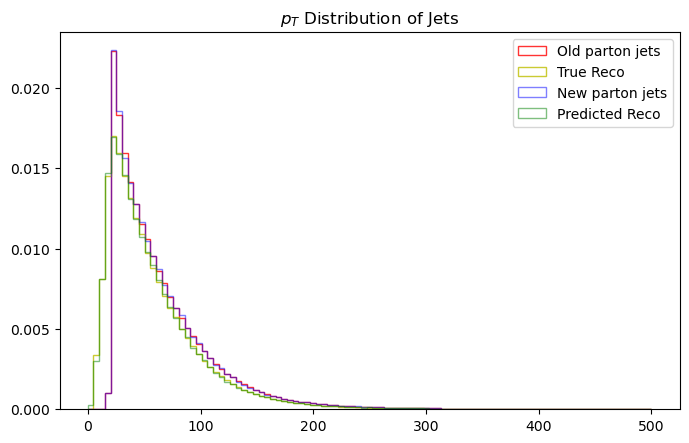

In [12]:
fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot()
bins = np.linspace(0, 500, 100)
ax.hist(data[:, 0], bins=bins, histtype='step', density=True, color='r', label='Old parton jets', alpha=0.8)
ax.hist(data[:, 4], bins=bins, histtype='step', density=True, color='y', label='True Reco', alpha=0.8)
ax.hist(new_data[:, 0], bins=bins, histtype='step', density=True, color='b', label='New parton jets', alpha=0.5)
ax.hist(new_data[:, 4], bins=bins, histtype='step', density=True, color='g', label="Predicted Reco", alpha=0.5)
ax.legend()
ax.set_title(r"$p_T$ Distribution of Jets")
plt.show()

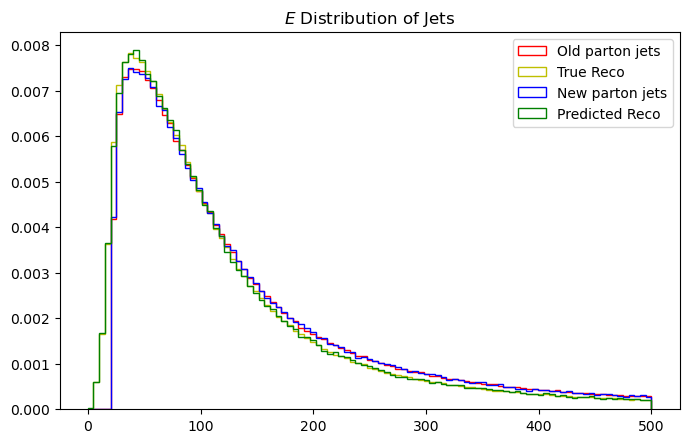

In [33]:
fig = plt.figure(figsize=(8,5), dpi=100)
ax = fig.add_subplot()
bins = np.linspace(0, 500, 100)
ax.hist(data[:, 3], bins=bins, histtype='step', density=True, color='r', label='Old parton jets')
ax.hist(data[:, 7], bins=bins, histtype='step', density=True, color='y', label='True Reco')
ax.hist(new_data[:,3], bins=bins, histtype='step', density=True, color='b', label='New parton jets')
ax.hist(new_data[:, 7], bins=bins, histtype='step', density=True, color='g', label="Predicted Reco")
ax.legend()
ax.set_title(r"$E$ Distribution of Jets")
plt.show()

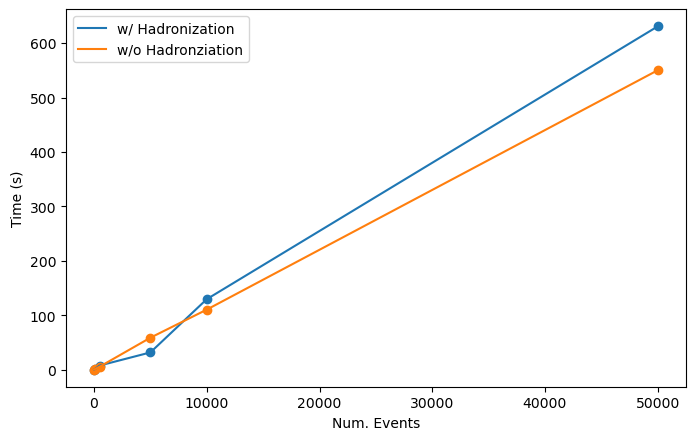

In [21]:
range_highs = [100, 130, 130, 200, 225, 250, 300, 400, 700, 1000]
range_lows = [0, 0, 0, 0, 25, 25, 0, 0, 0, 0]
j = 0
for center in [20, 50, 75, 100, 125, 150, 200, 250, 300, 600]:        
    partonPt = []
    predPt = []
    low = center - center/10
    high = center + center/10
    for i in range(len(data)):
        if (data[i, 0] > low and data[i, 0] < high):
            recoPt.append(data[i, 4])
            predPt.append(predict[i, 0])
    bins = np.linspace(range_lows[j], range_highs[j], 100)
    fig = plt.figure(figsize=(10,5), dpi=100)
    ax = fig.add_subplot(111)
    ax.hist(recoPt, bins=bins, label='True Jet Pt', alpha=0.5, ec="k", histtype='stepfilled')
    ax.hist(predPt, bins=bins, label='Predicted Jet Pt', alpha=0.4, ec="k", histtype='stepfilled')
    #ax.hist(energy, bins=bins, label='E', alpha=0.5)
    ax.set_xlabel("GeV")
    ax.set_ylabel("Count")
    ax.set_title("\n".join(wrap("Predicted and True Pt for Reco jets matching Parton Jets with {} < Pt < {} GeV. Count: {}".format(low, high, len(recoPt)), width=60)), fontsize=16)
    #ax.axvline(x=center/2)

    ax.legend(fontsize=14)
    plt.tight_layout()
    #ax.set_yscale('log')
    plt.show()
    #fig.savefig(save_dir+"/PtDistLog{}.png".format(j), facecolor="white", transparent="True")
    j+=1